ANEMO allows you to perform Fits on data of Smooth Pursuite Eyes Movements. You could use the functions ‘velocity’, ‘position’ and ‘saccades’ already present, but also your own functions. It must be initialized with the parameters of the experiment :

# The parameters of the experiment

**param_exp** is dictionary containing the parameters of the experiment

In [1]:
import numpy as np

screen_width_px = 1280
screen_width_cm = 36
viewingDistance = 57.

screen_width_deg = 2. * np.arctan((screen_width_cm/2) / viewingDistance) * 180/np.pi


param_exp = {# OBLIGATORY
             'N_trials' : 2, # number of trials per block
             'N_blocks' : 2, # number of blocks
             'dir_target' : [[-1, 1], [1, -1]], # list of lists for each block containing the direction of
                                                # the target for each trial is to -1 for left 1 for right
             'px_per_deg' : screen_width_px / screen_width_deg, # number of px per degree for the experiment

             # OPTIONAL
             'observer' : 'test', # subject name
             'list_events' : ['StimulusOn\n', 'StimulusOff\n',
                              'TargetOn\n', 'TargetOff\n'], # list of the names of the events of the trial
             'V_X_deg' : 15, # target velocity in deg/s
             'stim_tau' : 0.75, # presentation time of the target
             'RashBass' : 100, # the time the target has to arrive at the center of the screen in ms,
                               # to move the target back to t=0 of its `RashBass = velocity*latency`
              }

# Retrieving the data

Does not actually read EDFs directly, but the ASC files that are produced by edf2asc (SR Research). Information on saccades, fixations and blinks is read from the EDF, therefore based on SR Research algorithms.

In [2]:
from ANEMO import read_edf

In [3]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc' # path to the file that has to be read
start = 'TRIALID' # trial start string
data = read_edf(datafile, start)

# Data

In [4]:
from ANEMO import ANEMO
Plot = ANEMO.Plot(param_exp)

In [5]:
block, trial  = 1, 1 # number of the block and trial that you want to display
data = data[:4] # display the first four trials

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(data_show) :
    
    filts = [None, 'position', 'velocity', 'velocity-position']
    
    title = ['Raw data',
             'Filter on position',
             'Filter on velocity',
             'Filter on position and velocity']
    
    
    if data_show=='velocity' :
        nb_filt = 4
    else :
        nb_filt = 2
    
    for x in range(nb_filt) :
        fig, axs = Plot.plot_data(data=data, show=data_show,
                                  trials=trial, block=block,
                                  filt=filts[x], cutoff=30, sample_rate=1000,
                                  title=title[x])

**velocity**

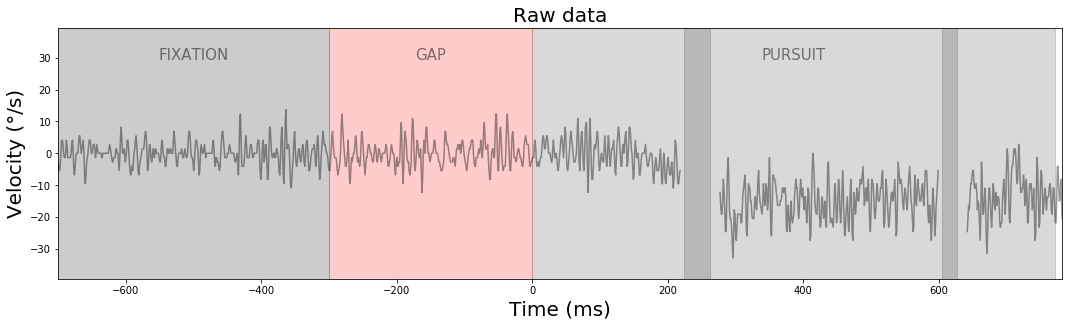

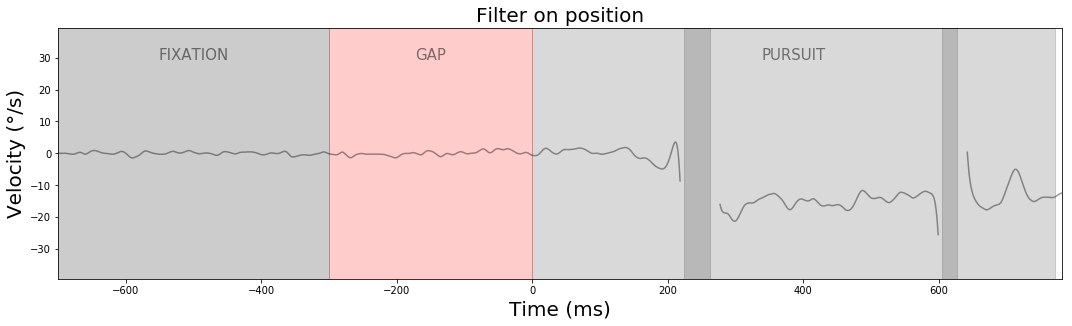

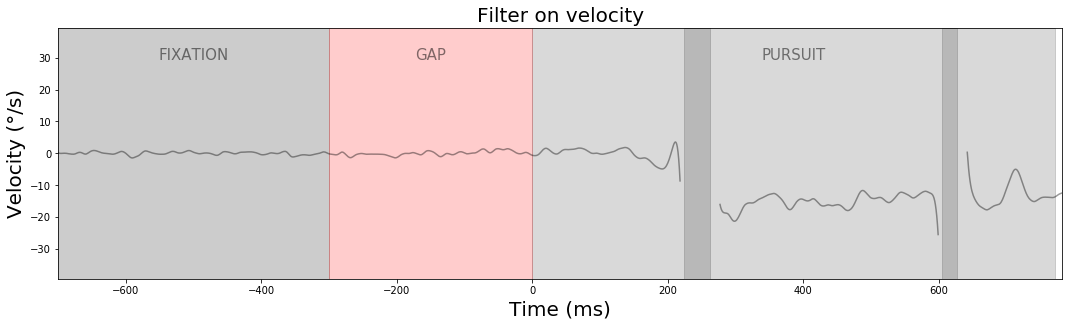

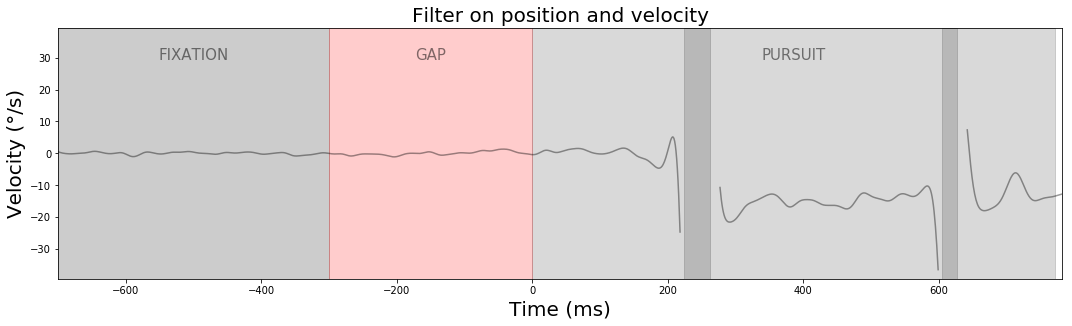

In [7]:
plot('velocity')

**position**

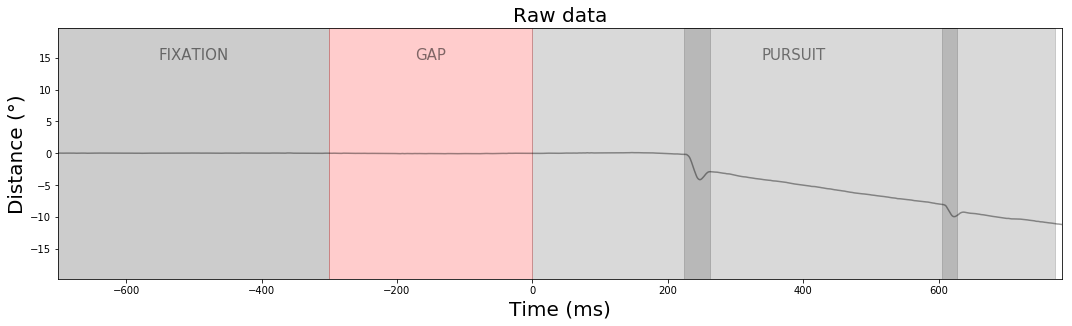

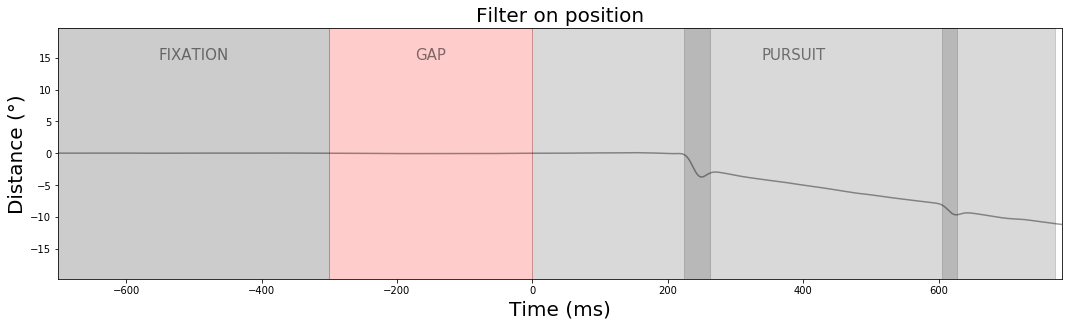

In [8]:
plot('position')

**saccade**

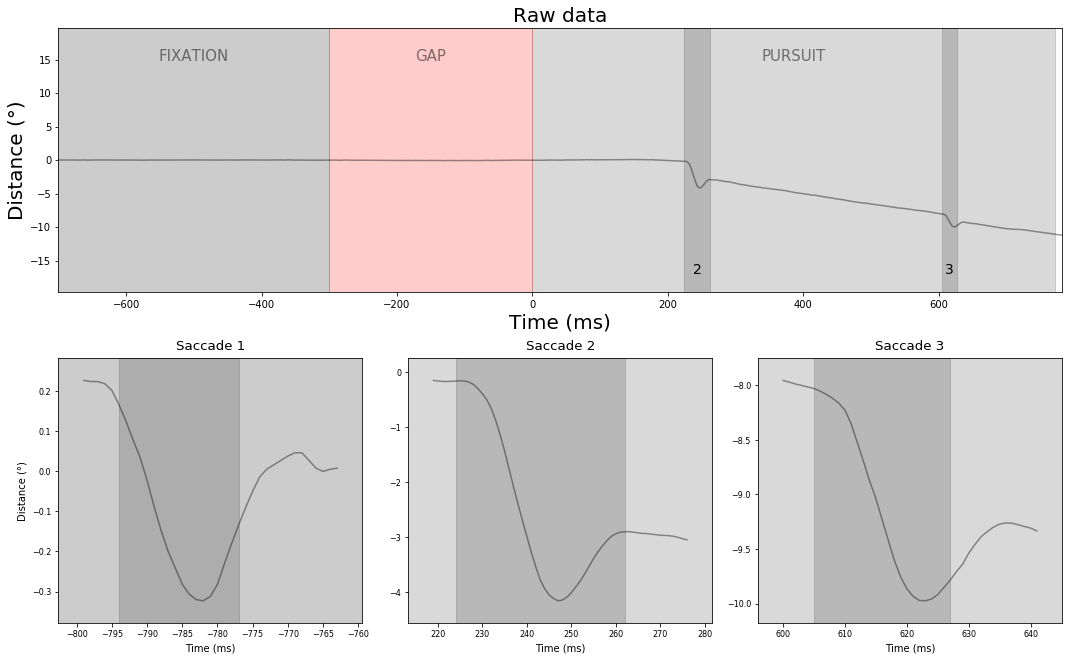

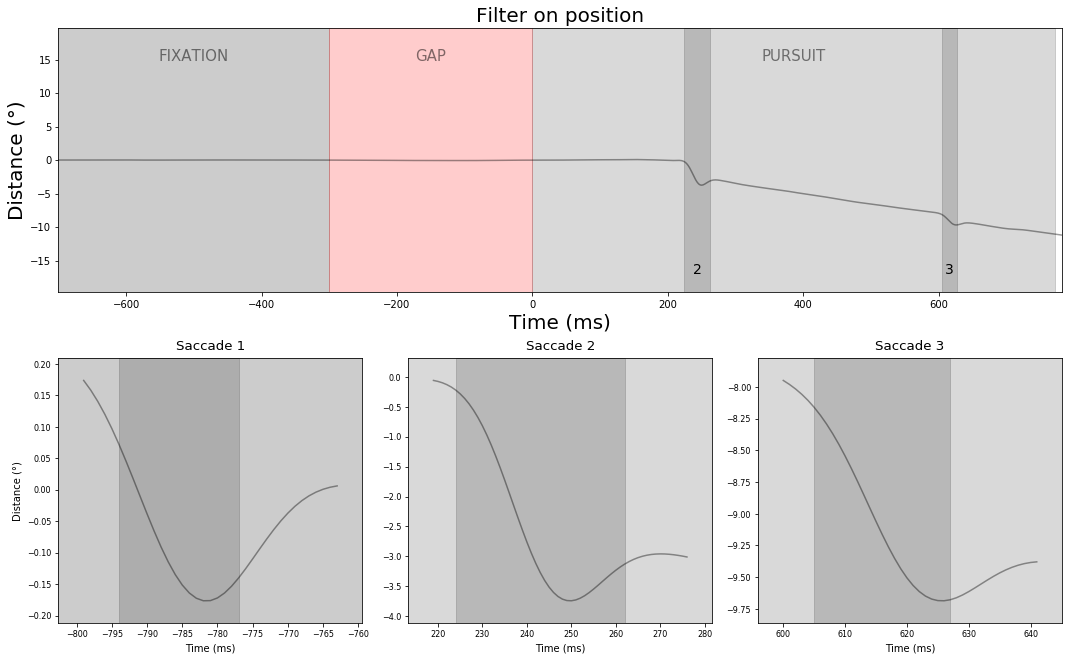

In [9]:
plot('saccade')

# Equation

**velocity**

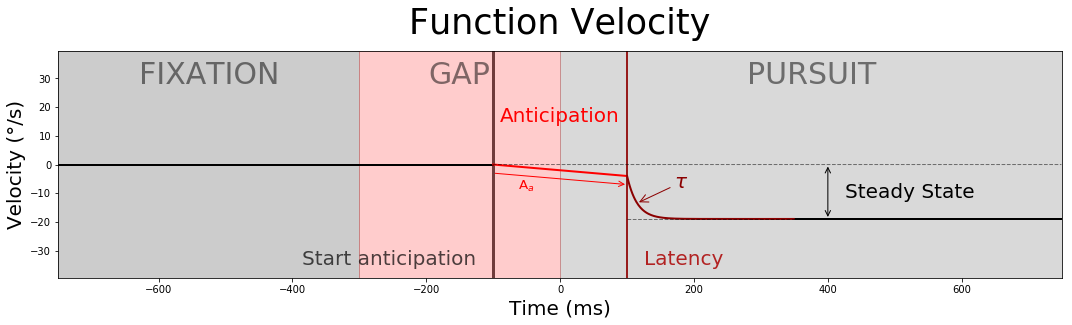

In [10]:
fig, axs = Plot.plot_equation(equation='fct_velocity')

**position**

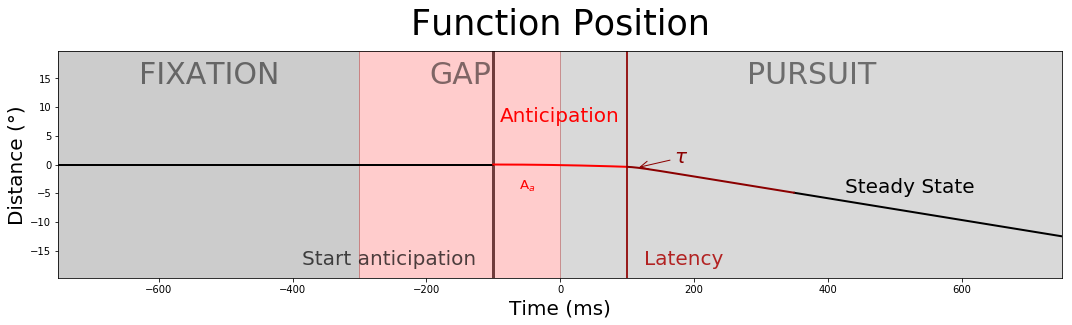

In [11]:
fig, axs = Plot.plot_equation(equation='fct_position')

**saccade**

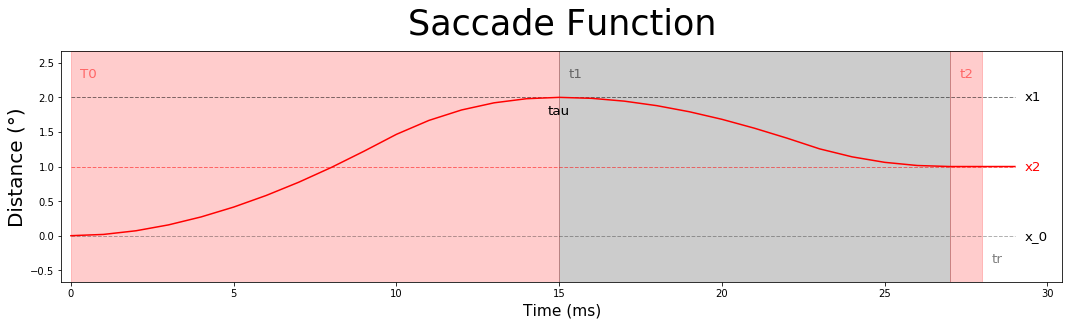

In [12]:
fig, axs = Plot.plot_equation(equation='fct_saccade')

# Fit

In [13]:
Fit = ANEMO.Fit(param_exp)

In [14]:
def fit(fct_fit) :
    
    filts = [None, 'position', 'velocity', 'velocity-position']
    
    title = ['Raw data',
             'Filter on position',
             'Filter on velocity',
             'Filter on position and velocity']
    
    
    if fct_fit=='fct_velocity' :
        nb_filt = 4
    else :
        nb_filt = 2
    
    for x in range(nb_filt) :
        fig, axs = Plot.plot_fit(data=data, equation=fct_fit,
                                 trials=trial, block=block,
                                 filt=filts[x], cutoff=30, sample_rate=1000,
                                 title=title[x])

**velocity**

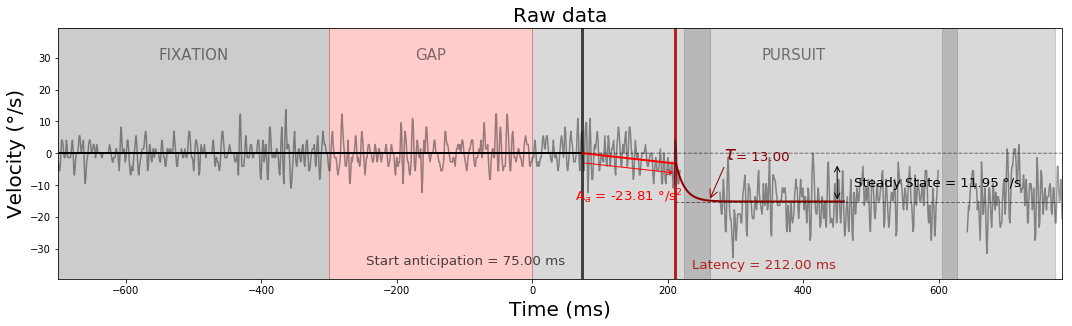

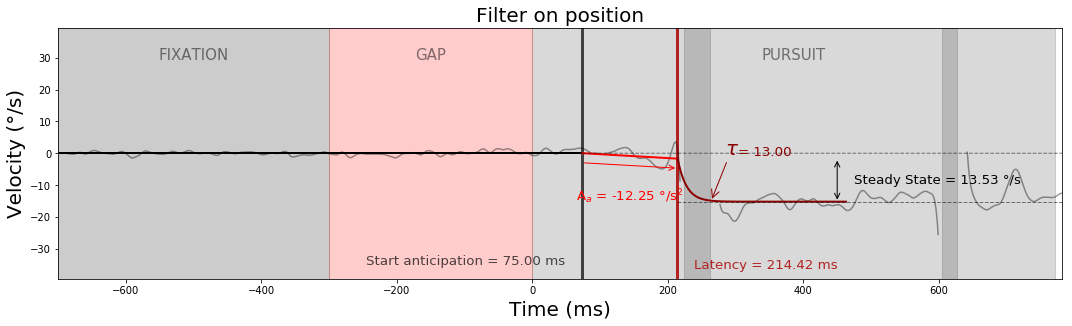

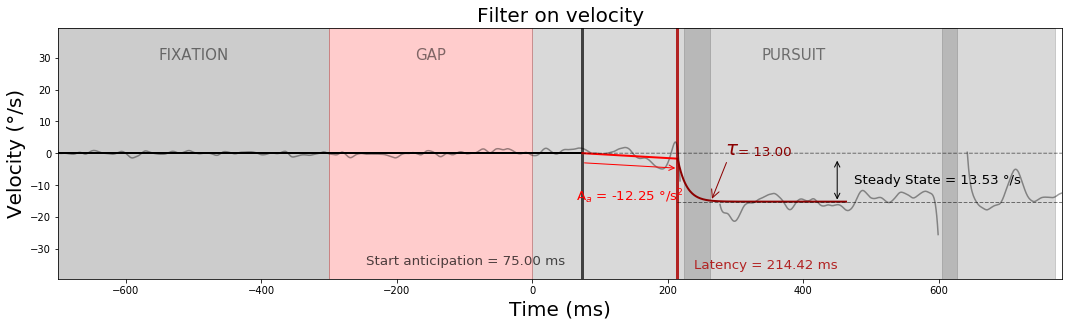

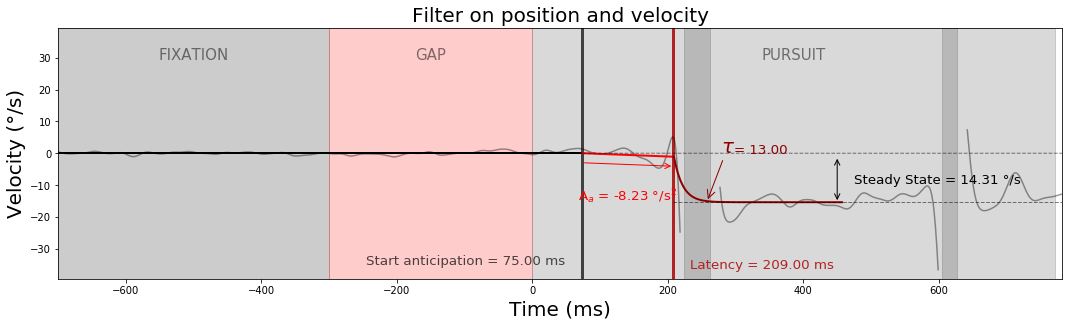

In [15]:
fit('fct_velocity')

**position**

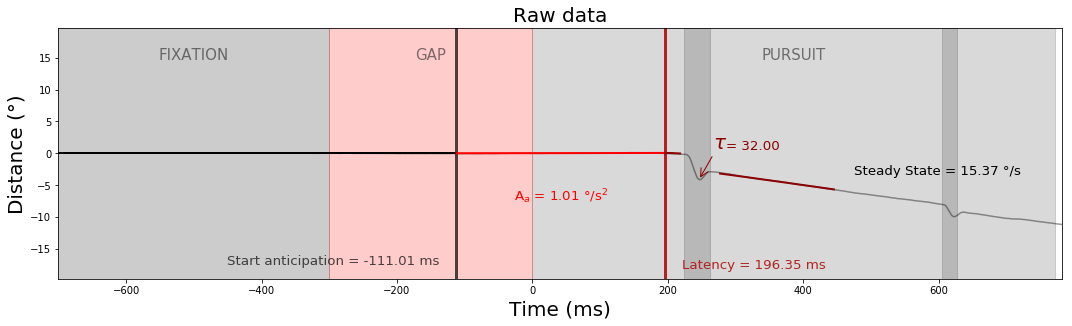

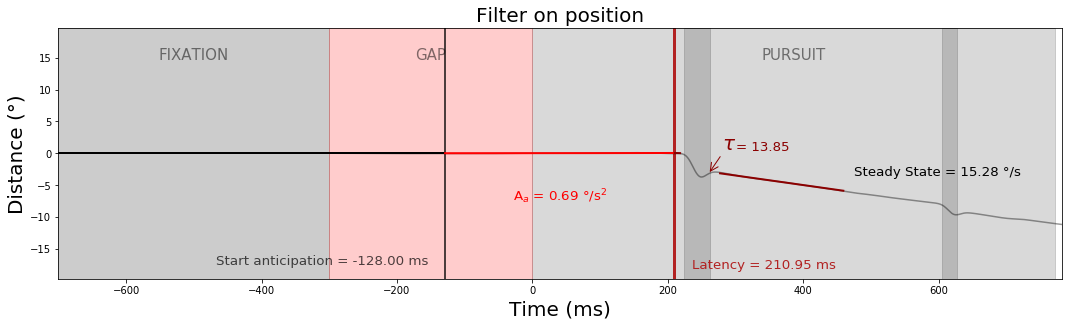

In [16]:
fit('fct_position')

**saccade**

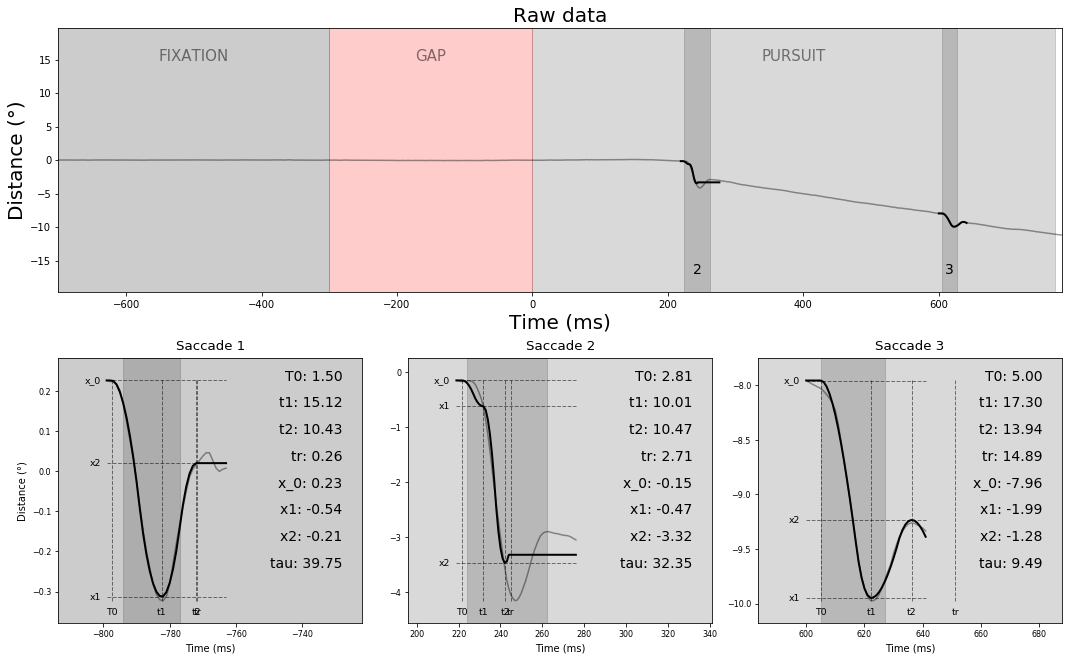

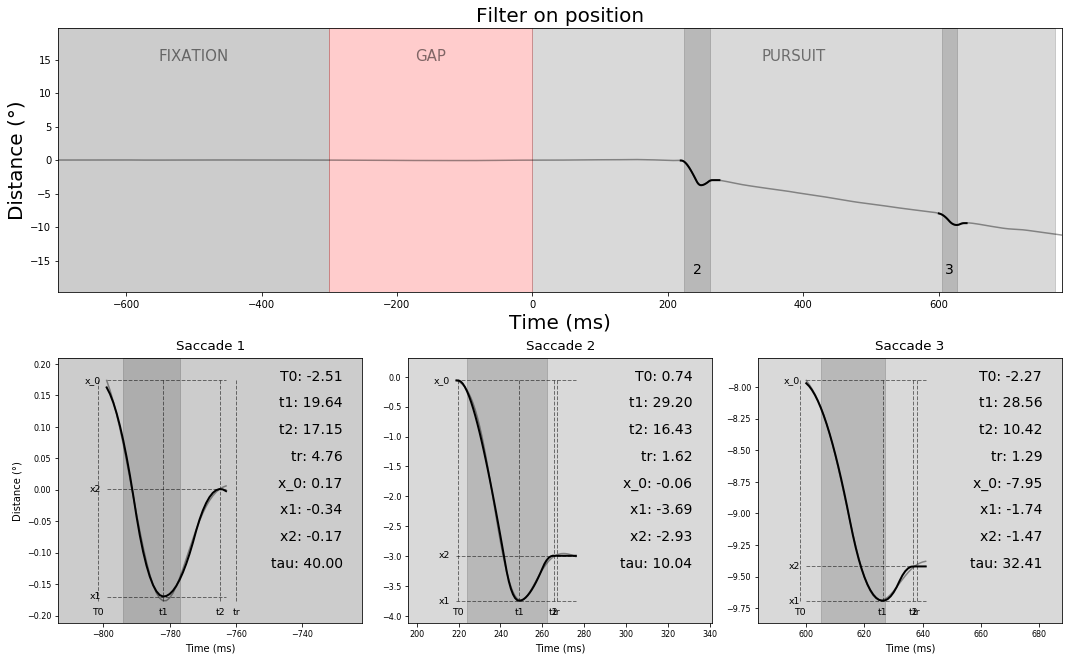

In [17]:
fit('fct_saccade')

# Full

In [18]:
# data divided into two blocks of two trials each
N_blocks, N_trials = 2, 2

## Data

**velocity**

In [19]:
Plot.plot_Full_data(data=data, show='velocity',
                    N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='_static/result/velocity')

print('-'*44, '\n', 'figure data saved in _static/result/velocity', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
--------------------------------------------
figure data saved in _static/result/velocity


**position**

In [20]:
Plot.plot_Full_data(data=data, show='position',
                    N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='_static/result/position')

print('-'*44, '\n', 'figure data saved in _static/result/position', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
--------------------------------------------
figure data saved in _static/result/position


**saccade**

In [21]:
Plot.plot_Full_data(data=data, show='saccade',
                    N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='_static/result/saccade')

print('-'*43, '\n', 'figure data saved in _static/result/saccade', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-------------------------------------------
figure data saved in _static/result/saccade


## Fit

In [22]:
import pickle

**velocity**

In [23]:
param = Fit.Fit_full(data=data, equation='fct_velocity', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None, cutoff=30, sample_rate=1000,
                     file_fig='_static/result/Fit_velocity')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_velocity', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_velocity.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_velocity', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_velocity
----------------------------------------------------
param fit saved in _static/result/param_Fit_velocity


**position**

In [24]:
param = Fit.Fit_full(data=data, equation='fct_position', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None, cutoff=30, sample_rate=1000,
                     file_fig='_static/result/Fit_position')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_position', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_position.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_position', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_position
----------------------------------------------------
param fit saved in _static/result/param_Fit_position


**saccade**

In [25]:
param = Fit.Fit_full(data=data, equation='fct_saccade', plot=True,
                     N_blocks=N_blocks, N_trials=N_trials,
                     filt=None, cutoff=30, sample_rate=1000,
                     file_fig='_static/result/Fit_saccade')
    
    
print('-'*46, '\n', 'figure fit saved in _static/result/Fit_saccade', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_saccade.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*51, '\n', 'param fit saved in _static/result/param_Fit_saccade', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
----------------------------------------------
figure fit saved in _static/result/Fit_saccade
---------------------------------------------------
param fit saved in _static/result/param_Fit_saccade


# Retrieving the parameters

In [26]:
def Retrieving_param(data_show):
    with open('_static/result/param_Fit_%s.pkl'%data_show, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name != 'fit' and name!='observer' :
            print(name, '=', param[name][0][0])

**velocity**

In [27]:
Retrieving_param('velocity')


Param recorded
---------------

dict_keys(['observer', 'fit', 'start_anti', 'v_anti', 'latence', 'tau', 'maxi', 'old_anti', 'old_max', 'old_latence'])

For the first trial
---------------

start_anti = -62.34902432998274
v_anti = -1.8118877858364044
latence = 193.0000018290532
tau = 72.24178510738794
maxi = 14.658510895995345
old_anti = -3.286044070072851
old_max = 15.093442067421275
old_latence = nan


**position**

In [28]:
Retrieving_param('position')


Param recorded
---------------

dict_keys(['observer', 'fit', 'start_anti', 'v_anti', 'latence', 'tau', 'maxi', 'old_anti', 'old_max', 'old_latence'])

For the first trial
---------------

start_anti = -500.9999999999369
v_anti = -0.8644671869035818
latence = 214.99999995812527
tau = 79.99999999887588
maxi = 13.589072814309752
old_anti = -3.286044070072851
old_max = 15.093442067421275
old_latence = nan


**saccade**

In [29]:
Retrieving_param('saccade')


Param recorded
---------------

dict_keys(['observer', 'fit', 'T0', 't1', 't2', 'tr', 'x_0', 'x1', 'x2', 'tau'])

For the first trial
---------------

T0 = [1.1802896405148928, 8.192986532151906, 6.250646971678023, 3.546714860064135]
t1 = [13.80368384554161, 19.34646634699066, 17.55825313325032, 17.57105648565289]
t2 = [11.070420107104905, 12.992243992733844, 10.012578595149208, 10.034011617461523]
tr = [4.389951441838846, 0.0038193190626487072, 1.1785212663955997, 2.8482170174241124]
x_0 = [-0.12880606816552265, -0.22160360416736463, -4.014450505605895, -10.217275704455709]
x1 = [0.5511798880079333, -3.8108508303072934, -2.4743874061130833, -1.5283121111871951]
x2 = [0.26429867842356636, -2.4104404690906653, -1.5019277523822971, -0.9723104486959242]
tau = [14.362669972043989, 27.15075127566345, 17.65312776832085, 5.494692034910924]
